In [2]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is inc

In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


# Efficientnet B0

In [3]:
from tensorflow.keras.applications import EfficientNetB0

model = EfficientNetB0(weights='imagenet')

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [5]:
import cv2
import numpy as np
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [6]:
img_path = '/content/sample.jpg'
img = cv2.imread(img_path)

In [8]:
img.shape

(3264, 4928, 3)

In [9]:
img = cv2.resize(img, (224, 224))

In [14]:
img.shape

(224, 224, 3)

In [10]:
x = np.expand_dims(img, axis=0)

In [12]:
x.shape

(1, 224, 224, 3)

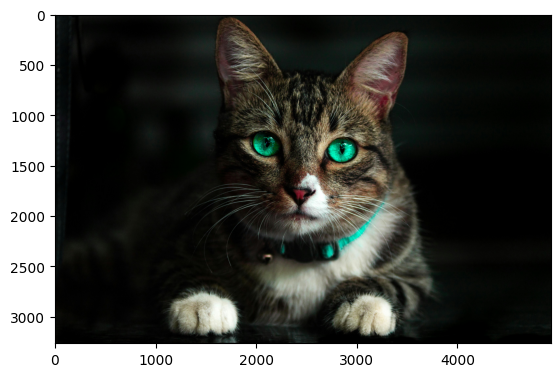

In [15]:
imshow(imread(img_path))

In [16]:
preds = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


In [17]:
preds

array([[1.49293177e-04, 1.21764388e-04, 6.39574864e-05, 8.96803176e-05,
        4.34822323e-05, 3.35291807e-05, 5.58207903e-05, 4.69706429e-05,
        5.44183022e-05, 8.33813683e-05, 5.86748502e-05, 8.77932325e-05,
        4.24915779e-05, 1.58794137e-04, 6.24312452e-05, 8.52526937e-05,
        1.04672377e-04, 1.16395458e-04, 1.34956717e-04, 3.79508820e-05,
        1.97905581e-04, 2.47206859e-04, 1.56706912e-04, 8.74478646e-05,
        6.07996946e-04, 2.58290645e-04, 1.35477312e-04, 1.21748890e-04,
        2.31325306e-04, 6.19451021e-05, 2.68532283e-04, 2.01201387e-04,
        9.26892244e-05, 3.67562207e-05, 9.44319472e-05, 4.35530746e-05,
        1.14108021e-04, 9.84841317e-05, 1.75622728e-04, 9.86173181e-05,
        1.81133219e-04, 7.67278325e-05, 7.19990931e-05, 9.73007554e-05,
        1.01423888e-04, 4.10543325e-05, 3.04272689e-04, 1.25951119e-04,
        5.35892868e-05, 1.15624774e-04, 1.73113862e-04, 9.21197789e-05,
        3.35234581e-05, 5.77591782e-05, 1.36615083e-04, 1.824199

In [18]:
decode_predictions(preds, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n02124075', 'Egyptian_cat', np.float32(0.35907778)),
  ('n02123045', 'tabby', np.float32(0.252272)),
  ('n02123159', 'tiger_cat', np.float32(0.25083533))]]

#Efficientnet B1

In [19]:
from tensorflow.keras.applications import EfficientNetB1

model = EfficientNetB1(weights='imagenet')

32148312/32148312 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
model.summary()

Model: "efficientnetb1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 240, 240,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 240, 240,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 240, 240,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 241, 241,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 120, 120,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 120, 120,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 120, 120,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 120, 120,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 120, 120,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 120, 120,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 120, 120,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 120, 120,  │        512 │ block1a_se_excit

 Total params: 7,856,239 (29.97 MB)

 Trainable params: 7,794,184 (29.73 MB)

 Non-trainable params: 62,055 (242.41 KB)

In [22]:
img_path = '/content/sample.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (240, 240))
x = np.expand_dims(img, axis=0)
preds = model.predict(x)
decode_predictions(preds, top=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


[[('n02123045', 'tabby', np.float32(0.7034846)),
  ('n02123159', 'tiger_cat', np.float32(0.11034101)),
  ('n02124075', 'Egyptian_cat', np.float32(0.07757383))]]

#Image Classification

In [34]:
!ls Corn_3_Classes_Image_Dataset

Explanation_Citation_Request.txt  Zea_mays_Indurata
Zea_mays_Chulpi_Cancha		  Zea_mays_Rugosa


In [51]:
import tensorflow as tf

# Path to dataset folder
data_dir = "Corn_3_Classes_Image_Dataset"

# Load training dataset (80%) and validation dataset (20%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,   # 20% for validation
    subset="training",
    seed=123,               # reproducibility
    image_size=(224, 224),  # resize for EfficientNetB0
    batch_size=32,
    label_mode="categorical"   # <-- one-hot labels
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"   # <-- one-hot labels
)



Found 1050 files belonging to 3 classes.
Using 840 files for training.
Found 1050 files belonging to 3 classes.
Using 210 files for validation.


In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 3)
Label: tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


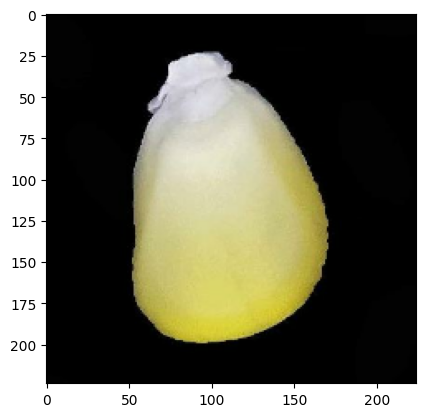

In [53]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    imshow(images[0].numpy().astype("uint8"))
    print("Label batch shape:", labels.shape)
    print("Label:",labels[0])


In [54]:
NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

In [60]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)


In [61]:

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [62]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3)              │     4,053,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 4,011,391 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [63]:
hist = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5696 - loss: 3.5350 - val_accuracy: 0.3143 - val_loss: 1.3920
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.8928 - loss: 0.5118 - val_accuracy: 0.3810 - val_loss: 8.7164
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9607 - loss: 0.2195 - val_accuracy: 0.3810 - val_loss: 16.1428
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9559 - loss: 0.1873 - val_accuracy: 0.3810 - val_loss: 14.3895
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9680 - loss: 0.2042 - val_accuracy: 0.3810 - val_loss: 5.1364
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9946 - loss: 0.0185 - val_accuracy: 0.3810 - val_loss: 6.0431
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9961 - loss: 0.0319 - val_accuracy: 0.3810 - val_loss: 11.8943
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9687 - loss: 0.2018 - val_accuracy: 

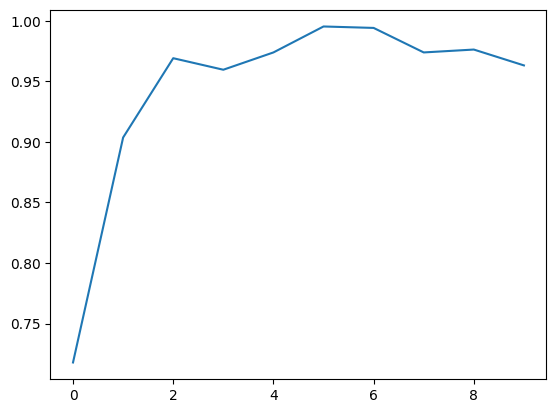

In [67]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])

In [68]:
preds = model.evaluate(val_ds)
print("Accuaracy on val: ", preds[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2830 - loss: 144.0758
Accuaracy on val:  0.3047619163990021


#Transfer Learning

In [70]:
from tensorflow.keras.applications import EfficientNetV2B0

In [71]:
model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [72]:
model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 224, 224,  │          0 │ input_layer_10[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 224, 224,  │          0 │ rescaling_8[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_6[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [73]:
for layer in model.layers:
  layer.trainable = False

In [74]:
model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 224, 224,  │          0 │ input_layer_10[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 224, 224,  │          0 │ rescaling_8[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_6[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model_combined = Sequential()
model_combined.add(model)
model_combined.add(Conv2D(1024,3,1,activation='relu'))
model_combined.add(GlobalAveragePooling2D())
model_combined.add(Dense(1024, activation='relu'))
model_combined.add(Dropout(0.2))
model_combined.add(Dense(1024, activation='relu'))
model_combined.add(Dropout(0.2))
model_combined.add(Dense(1, activation='sigmoid'))
model_combined.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 1024)     │    11,797,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,817,041 (75.60 MB)

 Trainable params: 13,897,729 (53.02 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [86]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download competition data
!kaggle competitions download -c dogs-vs-cats

# Unzip
!unzip dogs-vs-cats.zip -d dogs-vs-cats


 98% 794M/812M [00:06<00:00, 309MB/s]
100% 812M/812M [00:06<00:00, 129MB/s]
Archive:  dogs-vs-cats.zip
  inflating: dogs-vs-cats/sampleSubmission.csv  
  inflating: dogs-vs-cats/test1.zip  
  inflating: dogs-vs-cats/train.zip  


In [87]:
!unzip dogs-vs-cats/train.zip -d train
!unzip dogs-vs-cats/test1.zip -d test1

Streaming output truncated to the last 5000 lines.
  inflating: test1/test1/5499.jpg    
  inflating: test1/test1/55.jpg      
  inflating: test1/test1/550.jpg     
  inflating: test1/test1/5500.jpg    
  inflating: test1/test1/5501.jpg    
  inflating: test1/test1/5502.jpg    
  inflating: test1/test1/5503.jpg    
  inflating: test1/test1/5504.jpg    
  inflating: test1/test1/5505.jpg    
  inflating: test1/test1/5506.jpg    
  inflating: test1/test1/5507.jpg    
  inflating: test1/test1/5508.jpg    
  inflating: test1/test1/5509.jpg    
  inflating: test1/test1/551.jpg     
  inflating: test1/test1/5510.jpg    
  inflating: test1/test1/5511.jpg    
  inflating: test1/test1/5512.jpg    
  inflating: test1/test1/5513.jpg    
  inflating: test1/test1/5514.jpg    
  inflating: test1/test1/5515.jpg    
  inflating: test1/test1/5516.jpg    
  inflating: test1/test1/5517.jpg    
  inflating: test1/test1/5518.jpg    
  inflating: test1/test1/5519.jpg    
  inflating: test1/test1/552.jpg     

In [90]:
import shutil
import os
list


for file_name in os.listdir("/content/train/train"):


dog.4747.jpg
cat.5317.jpg
dog.737.jpg
cat.2286.jpg
dog.11152.jpg
cat.5705.jpg
dog.2659.jpg
dog.227.jpg
dog.9342.jpg
dog.9778.jpg
cat.8231.jpg
cat.10014.jpg
dog.949.jpg
dog.11782.jpg
cat.5114.jpg
dog.11774.jpg
dog.4559.jpg
dog.5252.jpg
cat.5715.jpg
dog.11571.jpg
cat.11776.jpg
cat.6591.jpg
dog.3072.jpg
cat.8768.jpg
cat.9717.jpg
cat.6700.jpg
cat.9334.jpg
cat.6926.jpg
dog.10413.jpg
dog.5539.jpg
cat.2944.jpg
dog.3590.jpg
cat.2842.jpg
cat.1598.jpg
cat.5897.jpg
dog.11344.jpg
cat.689.jpg
cat.8791.jpg
dog.10181.jpg
cat.6403.jpg
dog.9116.jpg
cat.6072.jpg
cat.4808.jpg
cat.5192.jpg
dog.2870.jpg
dog.6400.jpg
cat.6915.jpg
cat.7952.jpg
cat.8800.jpg
dog.7698.jpg
cat.4722.jpg
dog.2049.jpg
cat.2164.jpg
dog.10206.jpg
dog.11832.jpg
dog.3848.jpg
cat.1422.jpg
dog.5837.jpg
dog.6842.jpg
dog.1538.jpg
dog.10094.jpg
dog.12355.jpg
dog.817.jpg
dog.6247.jpg
cat.7484.jpg
cat.2357.jpg
dog.3776.jpg
cat.1185.jpg
dog.4312.jpg
dog.7043.jpg
cat.1807.jpg
cat.12397.jpg
dog.9888.jpg
dog.9087.jpg
cat.11656.jpg
cat.1866.jpg
do